# Test of eddy detection functions
### Using the eddies.py functions, to be modified to calculate all eddies in Lebreton data ###

*JASaa*

*ISAE-SUPAERO*

## Load data and import functions

In [1]:
from eddies import eddy_detection,print_eddies,plot_eddies,local_peaks,local_minima3D,find_local_mins

#name of the netCDF data file
filename = 'Lebreton_2015.nc'
# Confidence level, usually 90%
R2_criterion = 0.9
# OW value at which to begin the evaluation of R2
OW_start = -1.0
# Number of local minima to evaluate using R2 method.
# Set low (like 20) to see a few R2 eddies quickly.
# Set high (like 1e5) to find all eddies in domain.
max_evaluation_points = 100
# Minimum number of cells required to be identified as an eddie.
min_eddie_cells = 9
# z-level to plot.  Usually set to 0 for the surface.
k_plot = 0

## Run R2 algorithm

In [2]:
%%capture
lon,lat,uvel,vvel,vorticity,OW,OW_eddies,eddie_census,nEddies,cyclonic_mask,intensity_mask = eddy_detection(filename,R2_criterion,OW_start,max_evaluation_points,min_eddie_cells)

## Print eddy census

In [3]:
print_eddies(eddie_census,nEddies)


Eddie census data

        minOW   circ(m^2/s)      lon(º)     lat(º)  cells  diameter(km)
1   -2.244512   5675.036081 -138.916672  38.250000  202.0    131.739504
2   -1.579856  -4707.889680 -150.833328  28.083334   62.0     78.076864
3   -1.184231   2286.178034 -127.250000  27.916666   39.0     62.269935
4   -1.510409   3035.994187 -143.833328  39.250000   67.0     75.892314
5   -1.452889  -2579.739119 -150.000000  28.500000   41.0     63.623322
6   -1.123407   2761.526939 -131.333328  25.333334   39.0     62.991537
7   -1.326246  -4192.669342 -145.583328  25.750000  301.0    171.545255
8   -2.014597  -2861.738125 -156.416672  33.833332   30.0     53.156078
9   -2.028420   3551.089951 -139.583328  26.083334   52.0     72.258653
10 -15.529354 -10038.959427 -125.583336  38.916668   16.0     38.063304
11  -1.242687   2587.594001 -150.333328  38.583332   89.0     87.625503
12  -6.296369  -5050.286913 -138.416672  34.666668   43.0     62.930856
13  -5.788789   5129.866072 -125.416664  28.

## Plot velocities and eddies
# New intensity mask
Mask of eddy intensity like the cyclonic_mask but with the values

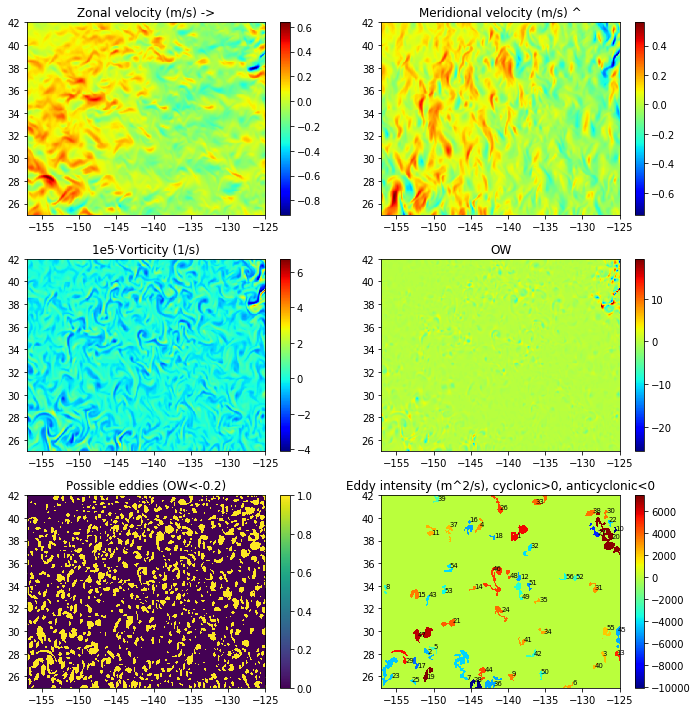

In [4]:
%matplotlib inline
plot_eddies(lon,lat,uvel,vvel,vorticity,OW,OW_eddies,eddie_census,nEddies,intensity_mask,k_plot)

## Comparing to cyclonic mask

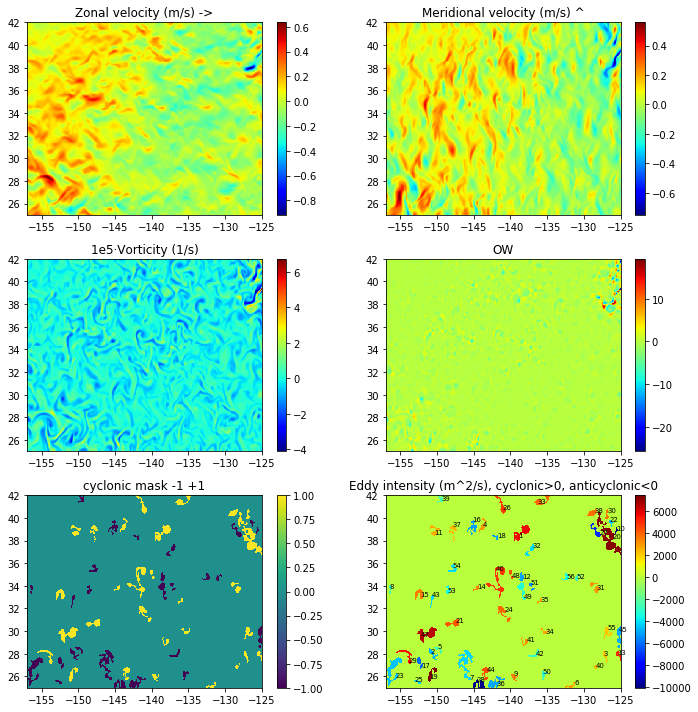

In [7]:
import matplotlib.pyplot as plt

fig,axes = plt.subplots(nrows=3, ncols=2,figsize=(10,10))

pos1 = axes[0,0].imshow(uvel[:,:,k_plot].T, extent=[lon[0],lon[-1],lat[0],lat[-1]],aspect='auto',origin="lower",cmap='jet')
axes[0,0].set_title('Zonal velocity (m/s) ->')

pos2 =axes[0,1].imshow(vvel[:,:,k_plot].T, extent=[lon[0],lon[-1],lat[0],lat[-1]],aspect='auto',origin="lower",cmap='jet')
axes[0,1].set_title('Meridional velocity (m/s) ^')

pos3 = axes[1,0].imshow(1e5*vorticity[:,:,k_plot].T, extent=[lon[0],lon[-1],lat[0],lat[-1]],aspect='auto',origin="lower",cmap='jet')
axes[1,0].set_title('1e5·Vorticity (1/s)')

pos4 = axes[1,1].imshow(OW[:,:,k_plot].T, extent=[lon[0],lon[-1],lat[0],lat[-1]],aspect='auto',origin="lower",cmap='jet')
axes[1,1].set_title('OW')

pos5 = axes[2,0].imshow(cyclonic_mask[:,:,k_plot].T, extent=[lon[0],lon[-1],lat[0],lat[-1]], aspect='auto',origin="lower")
axes[2,0].set_title('cyclonic mask -1 +1')

pos6 = axes[2,1].imshow(intensity_mask[:,:,k_plot].T, extent=[lon[0],lon[-1],lat[0],lat[-1]],aspect='auto',origin="lower",cmap='jet')
axes[2,1].set_title('Eddy intensity (m^2/s), cyclonic>0, anticyclonic<0')
for i in range(0,nEddies):
    text = axes[2,1].annotate(i+1, eddie_census[2:4,i])
    text.set_fontsize('x-small')
    text.set_color('k')

# add the colorbar using the figure's method,telling it which mappable we're talking about and which axes object it should be near
fig.colorbar(pos1, ax=axes[0,0])
fig.colorbar(pos2, ax=axes[0,1])
fig.colorbar(pos3, ax=axes[1,0])
fig.colorbar(pos4, ax=axes[1,1])
fig.colorbar(pos5, ax=axes[2,0])
fig.colorbar(pos6, ax=axes[2,1])

plt.tight_layout()
plt.show()